# Using KNN Algorithm to predict if a person will have diabetes or not

### importing libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


### loading the dataset

In [2]:
data = pd.read_csv('diabetes.csv')

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#### Replace columns like [Gluscose,BloodPressure,SkinThickness,BMI,Insulin] with Zero as values with mean of respective column

In [4]:
zero_not_accepted = ['Glucose','BloodPressure','SkinThickness','BMI','Insulin']
# for col in zero_not_accepted:
#     for i in data[col]:
#         if i==0:
#             colSum = sum(data[col])
#             meanCol=colSum/len(data[col])
#             data[col]=meanCol

for col in zero_not_accepted:
    data[col]= data[col].replace(0,np.NaN)
    mean = int(data[col].mean(skipna=True))
    data[col] = data[col].replace(np.NaN,mean)


### extracting independent variables

In [5]:
X = data.iloc[:,0:8]

### extracting dependent variable

In [6]:
y = data.iloc[:,8]

### Explorning data to know relation before processing

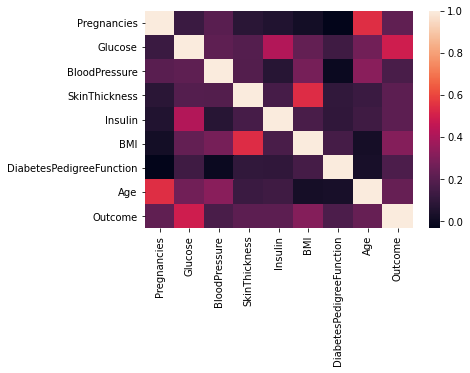

In [7]:
sns.heatmap(data.corr())

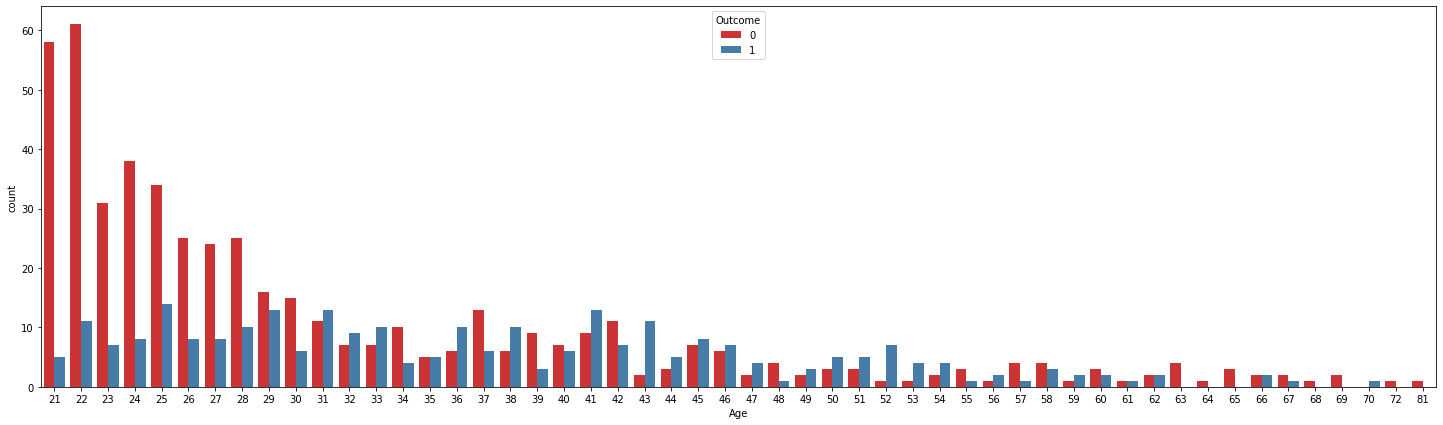

In [8]:
plt.figure(figsize=(25,7))
sns.countplot(x='Age',hue='Outcome',data=data,palette='Set1')

### splitting dataset into training and testing set

In [9]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)


 ### feature scaling

In [10]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### loading model - KNN

In [11]:
classifier = KNeighborsClassifier(n_neighbors=11,p=2,metric='euclidean')

### fitting model

In [12]:
.fit(X_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=11)

### making predictions

In [13]:
y_pred = classifier.predict(X_test)

### evaluating model

In [14]:
conf_matrix = confusion_matrix(y_test,y_pred)
print(conf_matrix)
print(f1_score(y_test,y_pred))


[[94 13]
 [15 32]]
0.6956521739130436


### accuracy


In [15]:
print(accuracy_score(y_test,y_pred))

0.8181818181818182


In [17]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87       107
           1       0.71      0.68      0.70        47

    accuracy                           0.82       154
   macro avg       0.79      0.78      0.78       154
weighted avg       0.82      0.82      0.82       154



In [20]:
import pickle
file = open('diabetes_prediction_knn.pkl','wb')
pickle.dump(classifier,file)

In [21]:
model = pickle.load(open('diabetes_prediction_knn.pkl', 'rb'), encoding='utf-8')

In [23]:
import pickle
file = open('Y_test_diabetes.pkl','wb')
pickle.dump(y_test,file)